In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [3]:
#1.Завантажте файл Housing.csv. Виведіть перші 5 рядків.
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#2.	Зробіть новий датасет, який містить тільки ці стовпчики.
#columns = ['price', 'area', 'bedrooms', 'bathrooms']
new = data.copy()
columns = ['price', 'area', 'bedrooms', 'bathrooms']
new = new[columns]
new.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [5]:
#3.Проведіть попередній аналіз даних
missing_data = new.isna().sum()
print(missing_data)

price        0
area         0
bedrooms     0
bathrooms    0
dtype: int64


In [6]:
#4.	Нормалізуйте дані перед подальшим використанням
for column in columns[1:]:
    new[column] = (data[column] - data[column].mean()) / data[column].std()
new.head()

,price,area,bedrooms,bathrooms
0,13300000,1.045766,1.402131,1.420507
1,12250000,1.755397,1.402131,5.400847
2,12250000,2.216196,0.047235,1.420507
3,12215000,1.082630,1.402131,1.420507
4,11410000,1.045766,1.402131,-0.569663


In [7]:
#5.Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) та цільову змінну (ціну на будинок).
x = new[['area', 'bedrooms', 'bathrooms']].values
y = new['price'].values

In [8]:
#6.Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [9]:
#7.Побудуйте модель лінійної регресії та навчіть її на навчальних даних.
# Створюємо модель лінійної регресії
model = LinearRegression()

# Навчаємо модель на навчальних даних
model.fit(X_train, y_train)


LinearRegression()

In [10]:
#8.Оцініть якість моделі на тестових даних, використовуючи показники, такі як середньоквадратична помилка (RMSE)
#та коефіцієнт детермінації (R^2).

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

RMSE: 1658324.6001036868
R^2: 0.4559299118872444


In [11]:
#Потім застосуйте  крос-валідацію для підвищення якості моделі. 
#Порівняйте результати (без крос-валідації і з крос-валідацією).
y_pred = model.predict(X_test)
print("Результати без крос-валідації:")
print("RMSE:", rmse)
print("R^2:", r2)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

mean_rmse = rmse_scores.mean()
mean_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

print("Результати з крос-валідацією:")
print("Середнє RMSE:", mean_rmse)
print("Середнє R^2:", mean_r2)



Результати без крос-валідації:
RMSE: 1658324.6001036868
R^2: 0.4559299118872444
Результати з крос-валідацією:
Середнє RMSE: 1264868.0775812494
Середнє R^2: 0.45481563115186374


In [12]:
#9.	Виконайте аналіз результатів та виведіть прогнозовані ціни на будинки для тестового набору даних.
# Зробіть прогнози на тестових даних
y_pred_test = model.predict(X_test)

# Створіть DataFrame для порівняння спостережуваних та прогнозованих значень
results = pd.DataFrame({'Спостережувані': y_test, 'Прогнозовані': y_pred_test})

# Виведіть результати
print(results)

     Спостережувані  Прогнозовані
0           4060000  6.383168e+06
1           6650000  6.230250e+06
2           3710000  3.597885e+06
3           6440000  4.289731e+06
4           2800000  3.930446e+06
..              ...           ...
104         9100000  4.995395e+06
105         3773000  5.316679e+06
106         7910000  6.417715e+06
107         7350000  6.057517e+06
108         5530000  6.092064e+06

[109 rows x 2 columns]


In [13]:
#10.Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) для цієї задачі,
#використовуючи формулу для спрощеного аналітичного рішення лінійної регресії.
X_train_analytical = np.hstack([np.ones((X_train.shape[0],1)), X_train])
coeff_analytical = np.linalg.inv(X_train_analytical.T.dot(X_train_analytical)).dot(X_train_analytical.T).dot(y_train)
intercept_analytical = coeff_analytical[0]
coefficients_analytical = coeff_analytical[1:]
print(f"intercept: {intercept_analytical}")
print(f"area, bedrooms, bathrooms: {coefficients_analytical}")


intercept: 4736303.161529643
area, bedrooms, bathrooms: [749711.17564277 265848.8684644  714672.41228002]


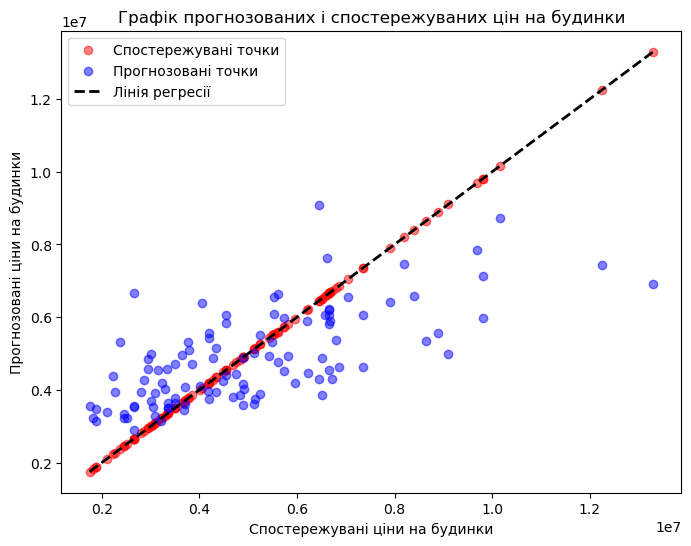

In [22]:
#11.Візуалізуйте дані та результати регресії: побудуйте графіки для ознайомлення з розподілом даних і лінійною регресійною моделлю.
plt.figure(figsize=(8, 6))

# Спостережувані значення в червоному кольорі
plt.scatter(y_test, y_test, c='red', label='Спостережувані точки', alpha=0.5)

# Прогнозовані значення в синьому кольорі
plt.scatter(y_test, y_pred, c='blue', label='Прогнозовані точки', alpha=0.5)

y_min = min(min(y_test), min(y_pred))
y_max = max(max(y_test), max(y_pred))
plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Лінія регресії')

plt.xlabel('Спостережувані ціни на будинки')
plt.ylabel('Прогнозовані ціни на будинки')
plt.title('Графік прогнозованих і спостережуваних цін на будинки')
plt.legend()
plt.show()

In [20]:
#12	Порівняйте отримані параметри (коефіцієнти) лінійної регресії з аналітичними результатами та оцініть, наскільки схожі вони.
print(f"intercept: {model.intercept_}")
print(f"area, bedrooms, bathrooms: {model.coef_}")


intercept: 4736303.161529644
area, bedrooms, bathrooms: [749711.17564277 265848.8684644  714672.41228002]


In [ ]:
# Висновки
'''
Нормалізували дані так, щоб вони мали середнє значення 0 і стандартне відхилення 1.
Використовуєте функцію train_test_split з бібліотеки scikit-learn для розділення набору даних на навчальний і тестовий.
Створили модель лінійної регресії за допомогою LinearRegression з бібліотеки scikit-learn і навчили її на навчальних даних за допомогою методу fit().
За допомогою крос-валідації отримали середнє значення RMSE та R^2 на основі п'яти різних розбиттів навчального набору даних. Це дозволило отримати
більш надійну оцінку якості моделі.
Порівняли значення RMSE та R^2 з крос-валідацією та без, отримали схожі результати.
Порівняйли отримані параметри (коефіцієнти) лінійної регресії з аналітичними результатами,отримали схожі результати.
R^2 в межах від 0 до 1
'''